In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [7]:
from joblib import load

In [8]:
df = pd.read_csv('termdeposit_test.csv')

In [12]:
model = load('my_trained_model.joblib')

In [13]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [14]:
df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [15]:
df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


In [17]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000
mean,22704.057726,40.887128,1358.496535,15.738646,258.278679,2.759510,41.648555,0.594441
std,12994.043329,10.604108,3082.940623,8.288174,258.488648,3.060928,101.985178,1.998193
min,1.000000,18.000000,-3313.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11546.000000,33.000000,71.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,22782.000000,39.000000,445.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33974.250000,48.000000,1413.250000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,45206.000000,95.000000,98417.000000,31.000000,3253.000000,58.000000,850.000000,55.000000


#We can see that the dataset do have some skewness and outliers especially by looking at the large differences between the 75th percentile and max values

In [18]:
df.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

<Axes: >

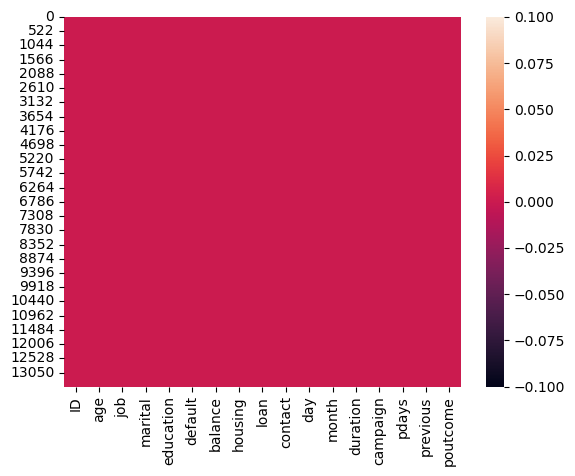

In [19]:
sns.heatmap(df.isnull())

In [20]:
nan = df.isna().sum()

In [21]:
df.nunique()

ID           13564
age             75
job             12
marital          3
education        4
default          2
balance       4292
housing          2
loan             2
contact          3
day             31
month           12
duration      1201
campaign        40
pdays          422
previous        33
poutcome         4
dtype: int64

In [22]:
df.duplicated().sum()

0

In [23]:
cat_col = df.select_dtypes(include=['object']).columns
cat_summary = {column: df[column].value_counts() for column in cat_col}
cat_summary

{'job': job
 blue-collar      2890
 management       2819
 technician       2290
 admin.           1540
 services         1251
 retired           690
 entrepreneur      479
 self-employed     456
 unemployed        398
 housemaid         366
 student           303
 unknown            82
 Name: count, dtype: int64,
 'marital': marital
 married     8119
 single      3868
 divorced    1577
 Name: count, dtype: int64,
 'education': education
 secondary    6978
 tertiary     4000
 primary      2043
 unknown       543
 Name: count, dtype: int64,
 'default': default
 no     13334
 yes      230
 Name: count, dtype: int64,
 'housing': housing
 yes    7546
 no     6018
 Name: count, dtype: int64,
 'loan': loan
 no     11451
 yes     2113
 Name: count, dtype: int64,
 'contact': contact
 cellular     8862
 unknown      3843
 telephone     859
 Name: count, dtype: int64,
 'month': month
 may    4097
 jul    2051
 aug    1914
 jun    1603
 nov    1187
 apr     877
 feb     822
 jan     426
 oct     

#Here we can see that there are a lot of people in blue collar job followed by management, technician, admin, services etc.
#There are higher number of married people compared to single and divorced which also suggest that married people usually have higher expenses compared to the other groups
#In terms of the client's educational profile, a lot of people have secondary education followed by tertiary and this also suggests the higher count for blue collar job.
#We can see really low number of defaults
#We can see that a lot of customers have housing loans
#Really low of levels of personal loan
#Higher number of cellular contacts followed by unknown and telephone
#A high count of contact month is in May
#for poutcome we can see very less success for the last campaign
#Bad level of subscribed 


In [24]:
num_col = df.select_dtypes(include=['int64']).columns
num_summary = {column: df[column].value_counts() for column in num_col}
num_summary

{'ID': ID
 38441    1
 23664    1
 23378    1
 18945    1
 32574    1
         ..
 4606     1
 23686    1
 35672    1
 8550     1
 34839    1
 Name: count, Length: 13564, dtype: int64,
 'age': age
 32    628
 34    609
 35    580
 31    579
 33    566
      ... 
 95      1
 86      1
 92      1
 89      1
 90      1
 Name: count, Length: 75, dtype: int64,
 'balance': balance
  0       1044
  1         58
  2         47
  3         46
  4         44
          ... 
 -140        1
  6495       1
  8180       1
  3684       1
  4256       1
 Name: count, Length: 4292, dtype: int64,
 'day': day
 20    843
 18    696
 17    595
 6     584
 21    581
 7     577
 14    565
 8     561
 28    554
 5     537
 19    529
 29    504
 15    495
 12    487
 13    486
 30    484
 11    465
 9     464
 16    434
 4     429
 2     393
 3     318
 27    317
 23    282
 26    274
 22    265
 25    254
 31    183
 10    164
 24    142
 1     102
 Name: count, dtype: int64,
 'duration': duration
 91      63


age
32    628
34    609
35    580
31    579
33    566
     ... 
95      1
86      1
92      1
89      1
90      1
Name: count, Length: 75, dtype: int64


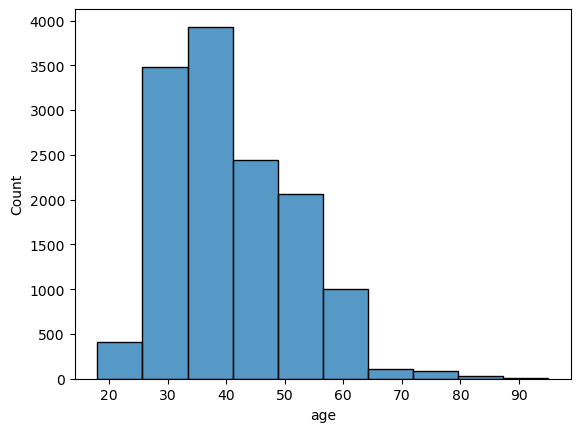

In [25]:
print(df['age'].value_counts())
plott = sns.histplot(x='age', data=df, bins=10)
plt.show()

#We can see that the majoirty of clients in this dataset fall under the 30 to 50 category. There are a lot of people however within the range of 30 to 40

pdays
-1      11030
 182       49
 92        47
 181       42
 183       41
        ...  
 378        1
 3          1
 34         1
 215        1
 163        1
Name: count, Length: 422, dtype: int64


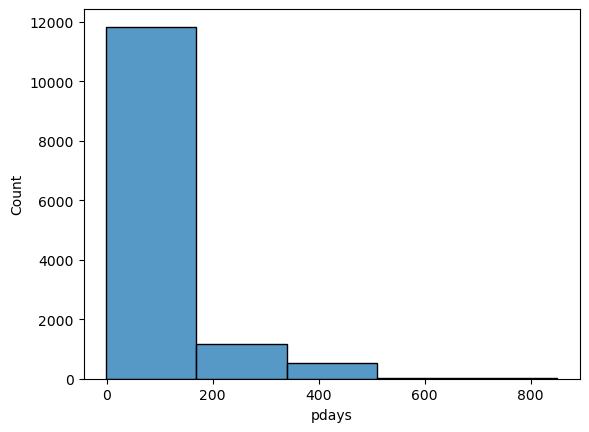

In [26]:
print(df['pdays'].value_counts())
plott = sns.histplot(x='pdays', data=df, bins=5)
plt.show()

In [27]:
#Here we can see that the service is quite good.

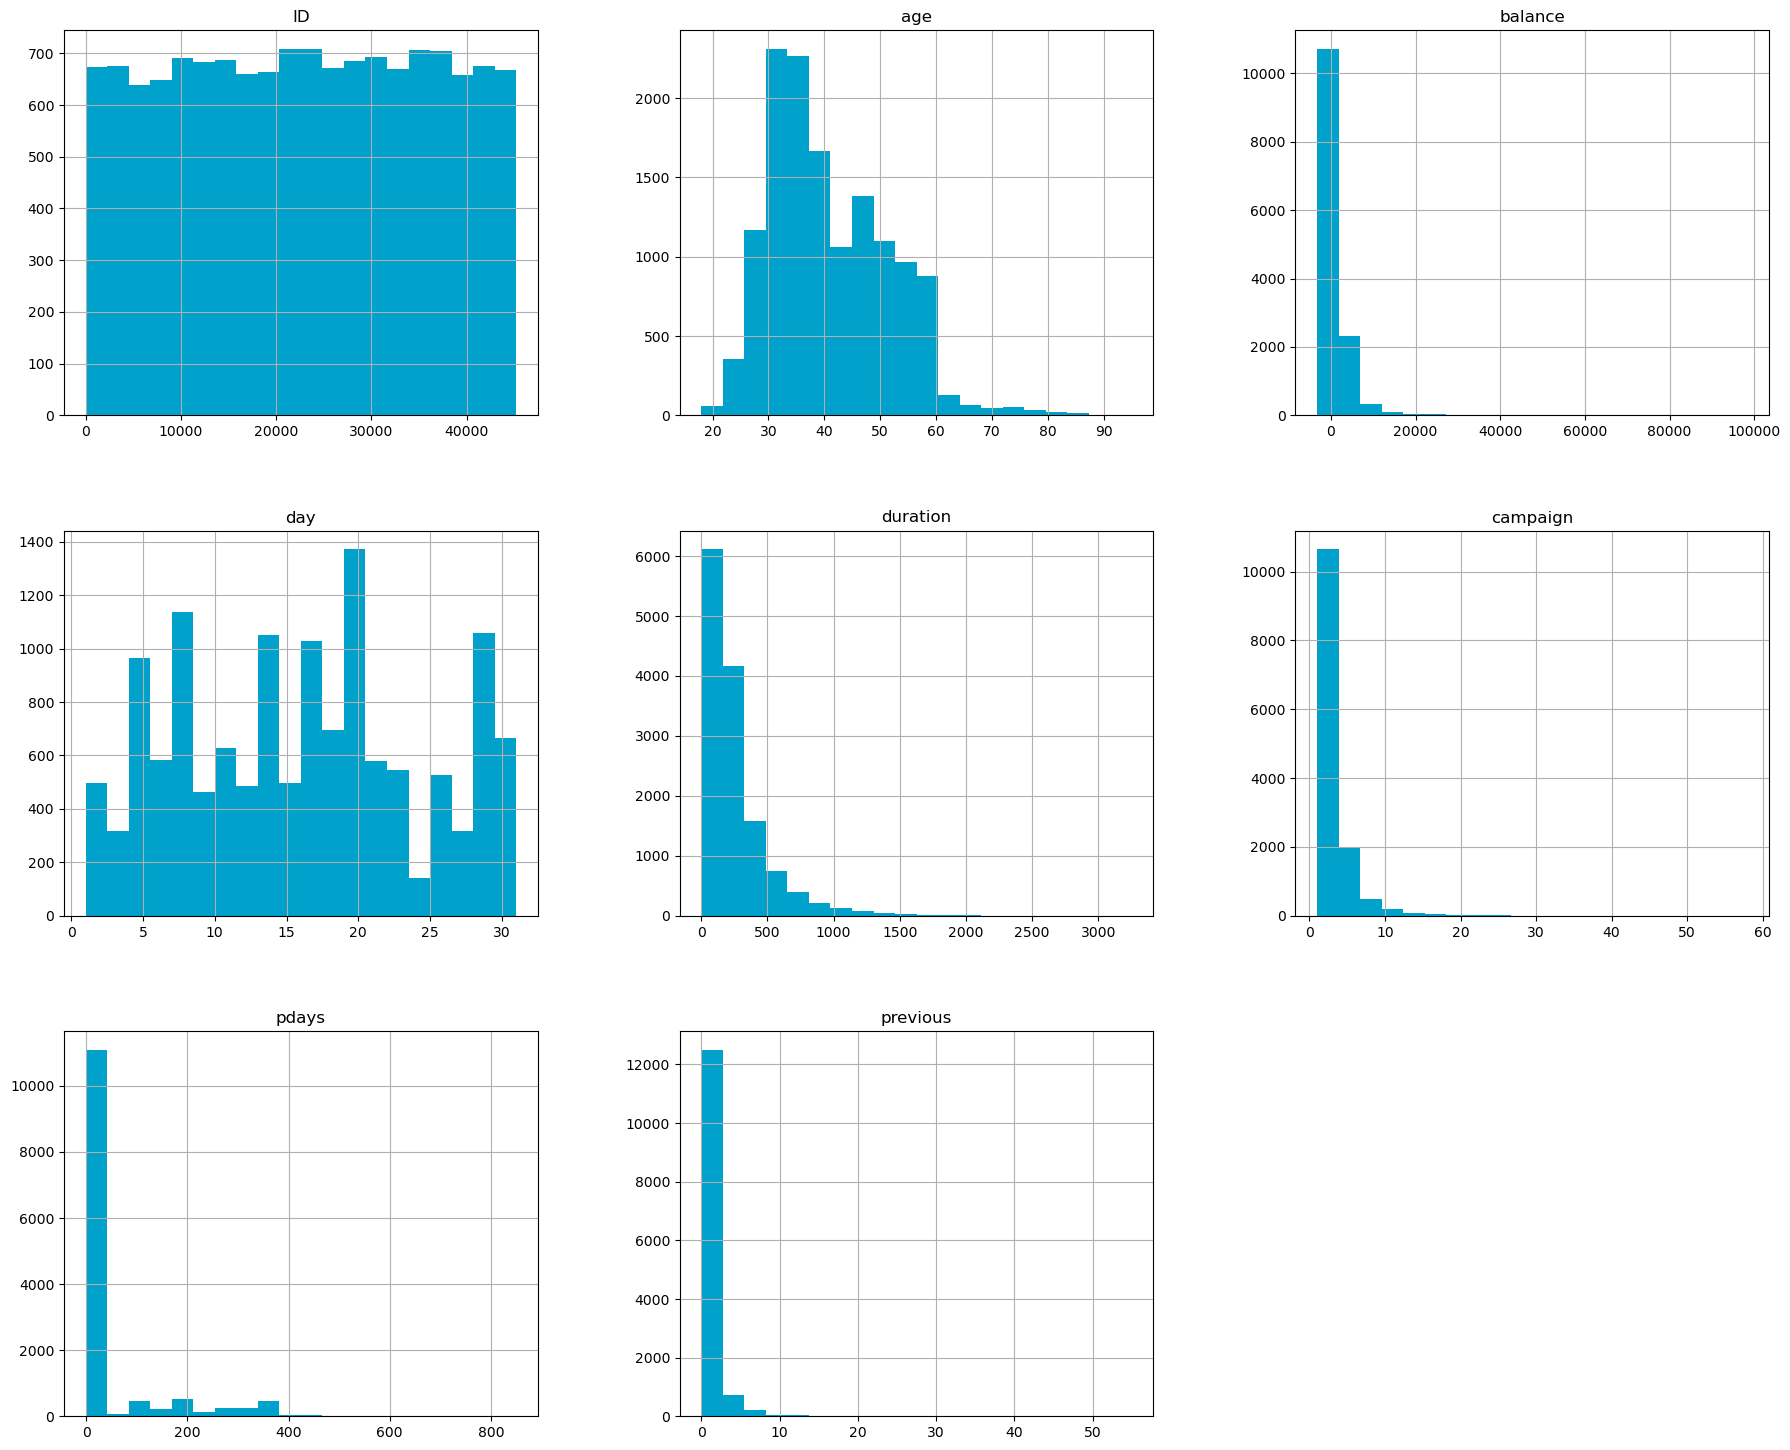

In [28]:
df.hist(bins=20, figsize=(22,18), color='#00a1cb');

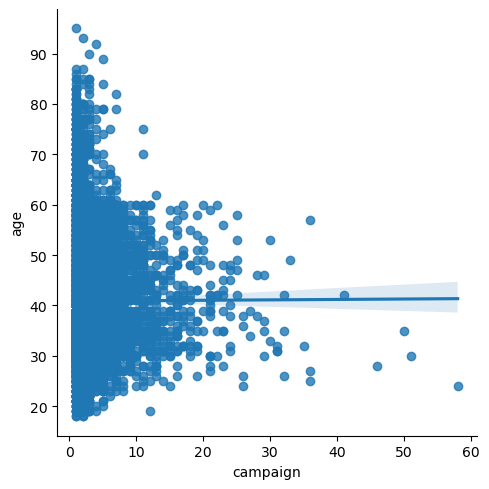

In [29]:
sns.lmplot(x='campaign', y='age', data=df)

In [ ]:
sns.lmplot(x='day', y='age', data=df)

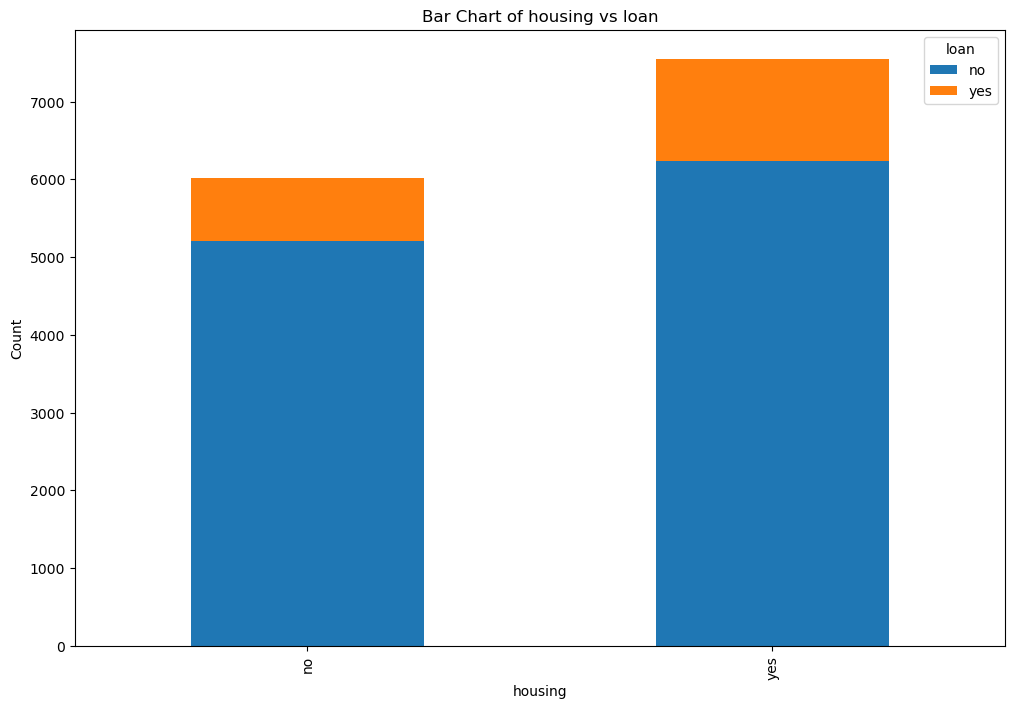

In [31]:
cat_col1 = 'housing'  
cat_col2 = 'loan' 
check_relation = pd.crosstab(df[cat_col1], df[cat_col2])
check_relation.plot(kind='bar', stacked=True, figsize=(12,8))
plt.title(f'Bar Chart of {cat_col1} vs {cat_col2}')
plt.ylabel('Count')
plt.show()

In [32]:
cat_column = 'education'
num_column = 'balance'
stats = df.groupby(cat_column)[num_column].agg(['mean', 'median', 'std'])

print(f"Statistic Analysis of {num_column} by {cat_column} status:")
print(stats)

Statistic Analysis of balance by education status:
                  mean  median          std
education                                  
primary    1222.069995   395.0  2761.793439
secondary  1166.557896   396.0  2537.188114
tertiary   1746.424000   553.0  3875.746713
unknown    1480.701657   562.0  3706.354924


Descriptive statistics of balance for each job category:

                      mean  median          std
job                                            
admin.         1194.146104   426.5  2923.485912
blue-collar    1100.788581   400.5  2103.615115
entrepreneur   1472.469729   315.0  4322.298630
housemaid      1207.617486   410.5  2182.664225
management     1782.892515   548.0  3965.223921
retired        1906.989855   746.0  4890.915942
self-employed  1517.914474   515.5  3121.070791
services        938.593925   329.0  1922.215682
student        1337.488449   491.0  2625.046206
technician     1241.431441   393.0  2550.305303
unemployed     1576.364322   520.0  2912.819142
unknown        2139.085366   928.0  3201.080844


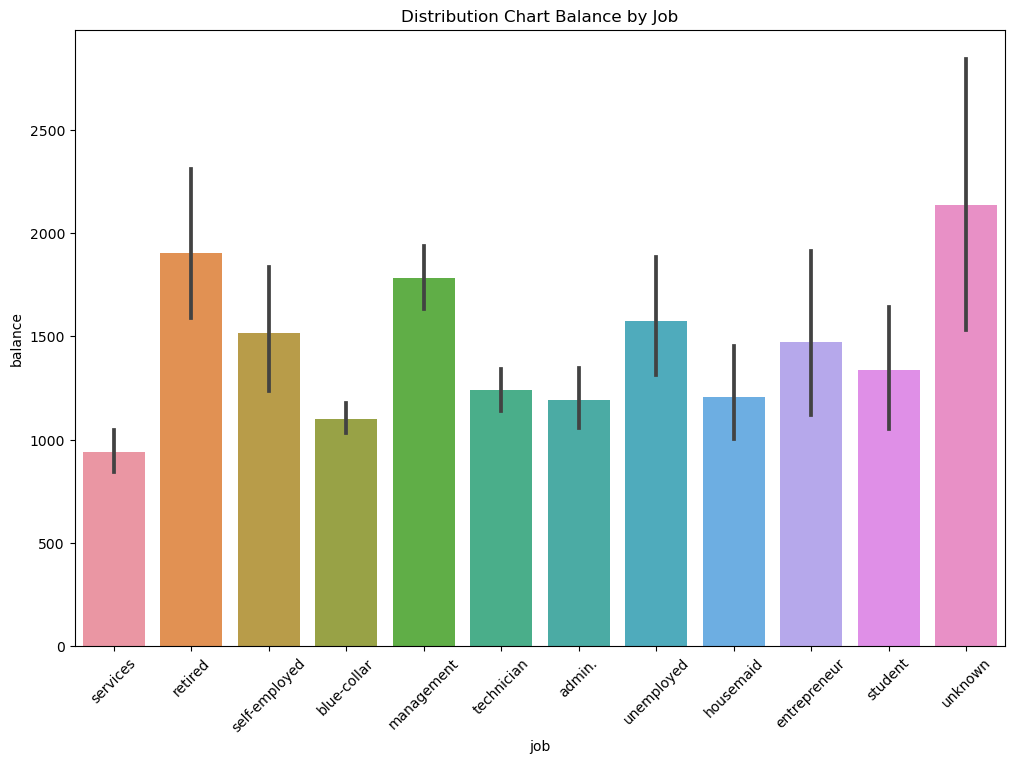

Descriptive statistics of balance for each marital category:

                 mean  median          std
marital                                   
divorced  1102.150285   315.0  2499.149667
married   1461.179825   492.0  3335.197618
single    1247.475957   416.0  2716.151403


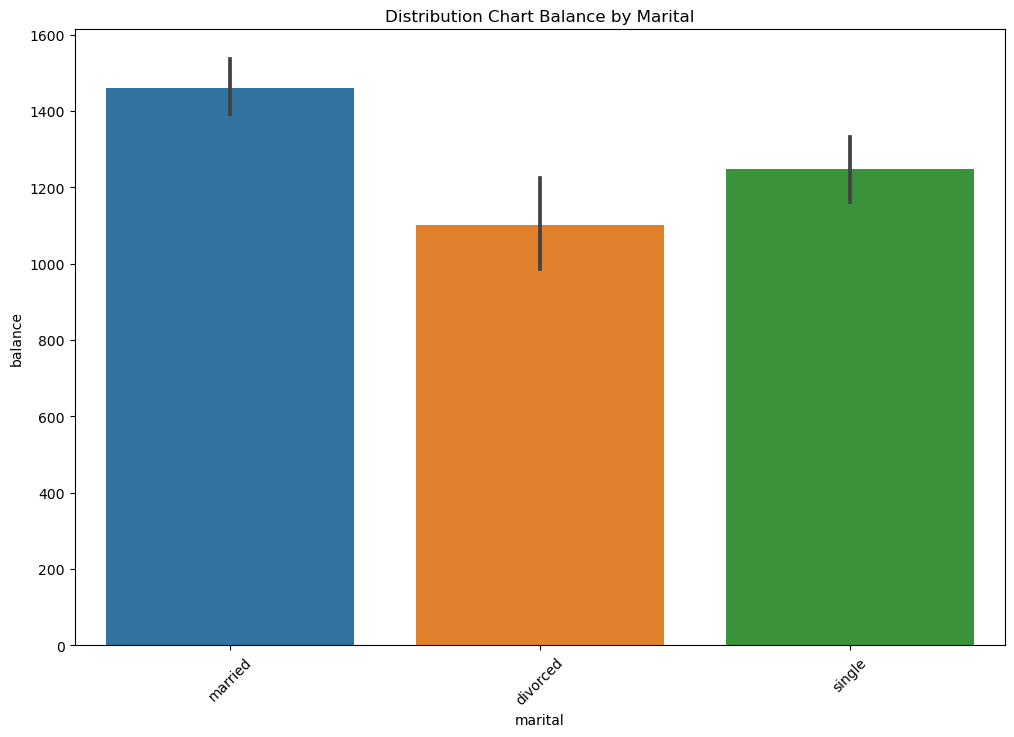

Descriptive statistics of balance for each education category:

                  mean  median          std
education                                  
primary    1222.069995   395.0  2761.793439
secondary  1166.557896   396.0  2537.188114
tertiary   1746.424000   553.0  3875.746713
unknown    1480.701657   562.0  3706.354924


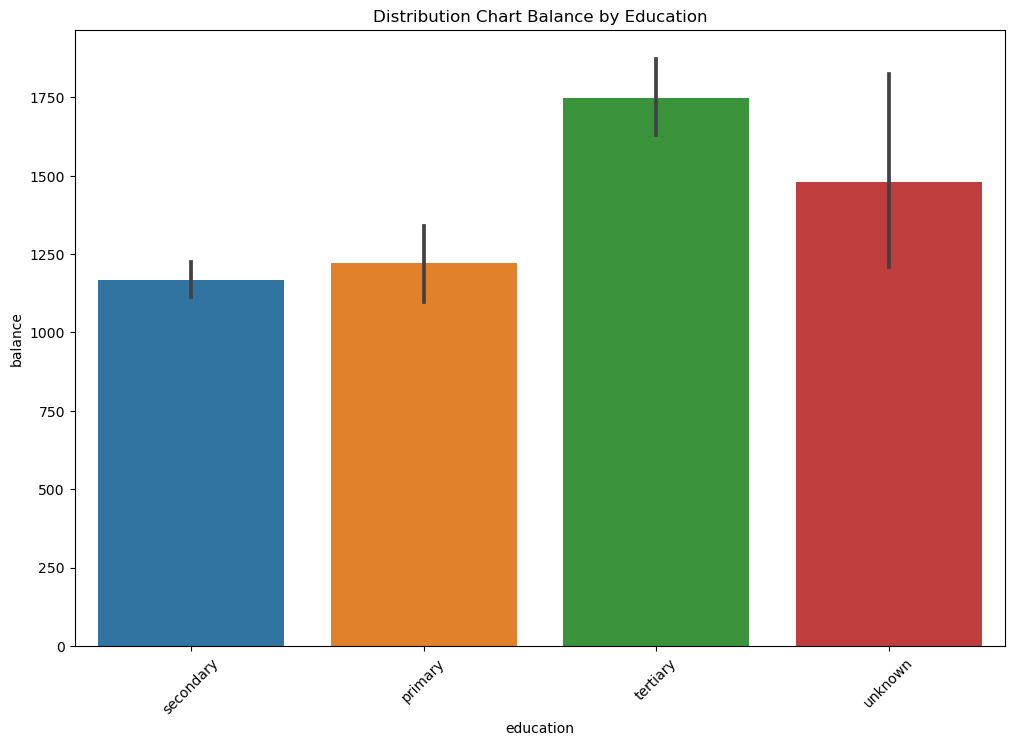

Descriptive statistics of balance for each age category:

           mean  median          std
age                                 
18   263.500000   221.5   307.578174
19   294.538462   179.0   344.653356
20   474.090909   291.0   588.008241
21   698.870968   243.0  1415.524302
22   831.162791   381.0  1008.977510
..          ...     ...          ...
89   553.000000   553.0          NaN
90     1.000000     1.0          NaN
92   775.000000   775.0          NaN
93   775.000000   775.0          NaN
95     0.000000     0.0          NaN

[75 rows x 3 columns]


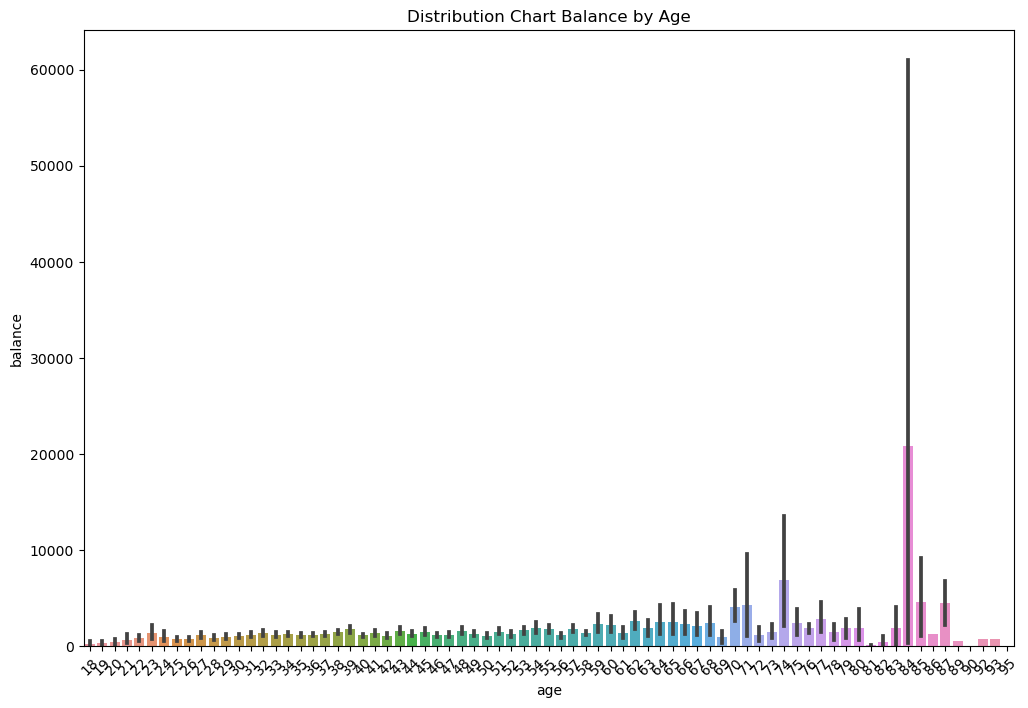

In [33]:
categorical_columns = ['job', 'marital', 'education','age']  
num_column = 'balance'
for cat_column in categorical_columns:
    stats = df.groupby(cat_column)[num_column].agg(['mean', 'median', 'std'])
    print(f"Descriptive statistics of {num_column} for each {cat_column} category:\n")
    print(stats)
    plt.figure(figsize=(12, 8))
    sns.barplot(x=cat_column, y=num_column, data=df)
    plt.title(f'Distribution Chart {num_column.capitalize()} by {cat_column.capitalize()}')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
#Similar analysis from the last file
#Some more distributiion charts
#Here we can see that the higher level of balance are in retired clients and clients working under management followed by self employed clients.
#We can also see the divorced client's have low level of balance and the highest level fo balance is found for married clients
#Clients with tertiary education have higher level of balance compared to the other groups
#Clients with tertiary education tends to have higher balance and thus higher chances of subscribing 
#finally clients above the age of 60 tends to have higher balance and thus higher chances of depositing as well as the bank can offer them various financial services since the acceptance chances seems to be higher for this group compared to other groups

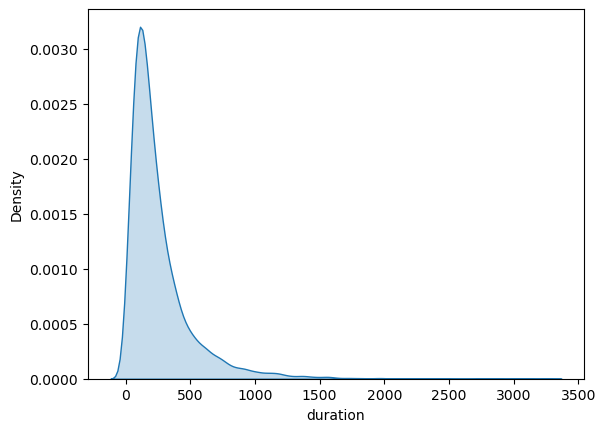

In [34]:
sns.kdeplot(df['duration'], shade=True)
plt.show()

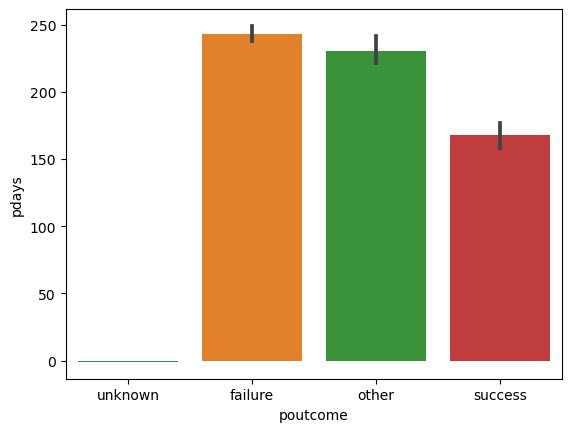

In [35]:
sns.barplot(x='poutcome', y='pdays', data=df)
plt.show()

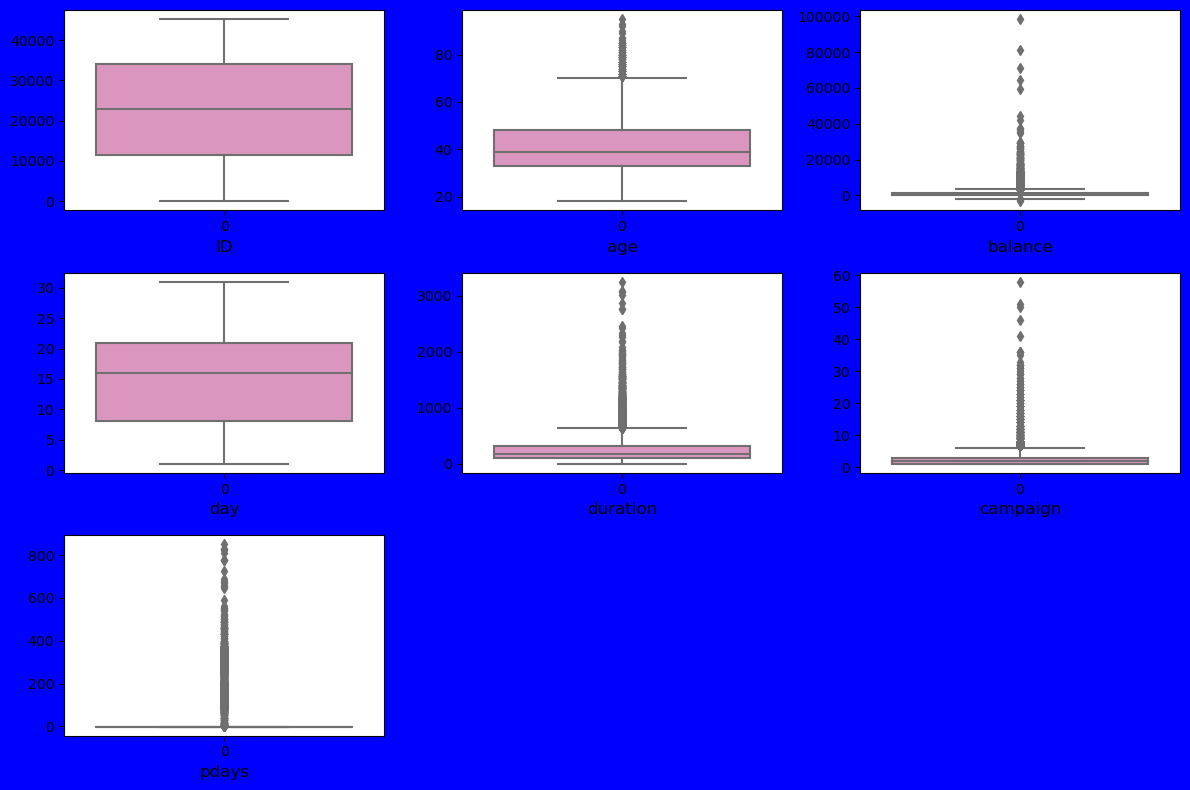

In [36]:
plt.figure(figsize= (12, 8), facecolor= "blue")
pn = 1
for col in num_col:
        if pn<=7:
            ax=plt.subplot(3, 3, pn)
            sns.boxplot(df[col], palette='Set2_r')
            plt.xlabel(col,fontsize = 12)
            plt.yticks(rotation = 0, fontsize = 10)
        pn+=1
plt.tight_layout()

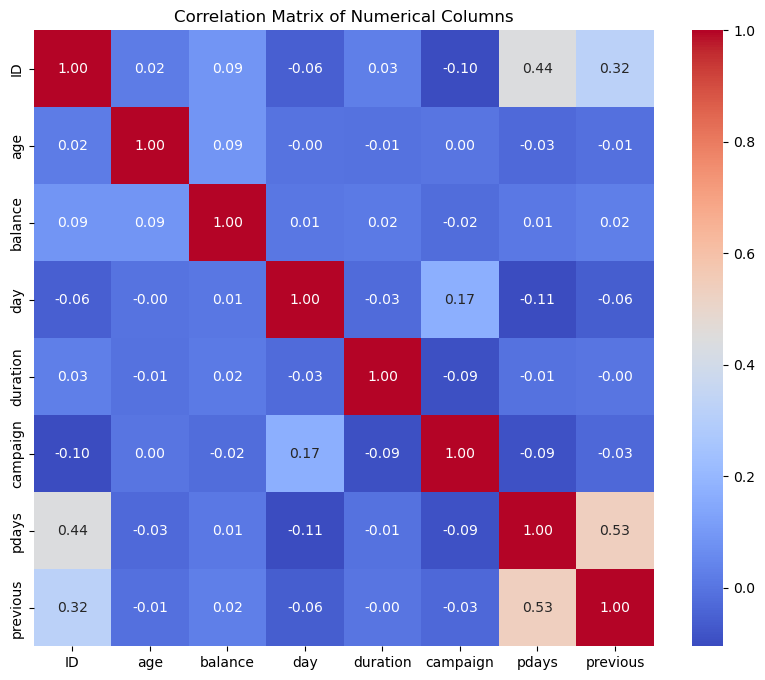

In [37]:
corr = df[num_col].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [39]:
from sklearn.preprocessing import LabelEncoder
filtered_data1 = df.copy()
Label_Encoder = {}
for col in cat_col:
    Label_Encoder[col] = LabelEncoder()
    filtered_data1[col] = Label_Encoder[col].fit_transform(filtered_data1[col])

In [43]:
filtered_data1.head(10)

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
5,16013,32,4,2,2,0,0,1,0,0,22,5,455,2,-1,0,3
6,196,33,1,2,1,0,307,1,0,2,5,8,309,2,-1,0,3
7,8516,37,4,1,1,0,341,0,0,2,3,6,120,2,-1,0,3
8,31208,36,9,0,2,0,1381,0,0,0,2,7,149,1,-1,0,3
9,38462,50,0,2,0,0,181,1,0,0,15,8,119,4,372,3,0


In [44]:
filtered_data1.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [48]:
filtered_data1.drop('ID', axis=1, inplace=True)

In [49]:
filtered_data1

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [50]:
cor = filtered_data1.corr()

In [51]:
cor

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
age,1.000000,-0.024413,-0.396771,-0.117274,-0.022243,0.085246,-0.189573,-0.022863,0.024945,-0.004622,-0.051712,-0.006456,0.002439,-0.027797,-0.011326,0.009334
job,-0.024413,1.000000,0.052579,0.158185,-0.010780,0.012731,-0.125409,-0.018603,-0.090929,0.027381,-0.100924,0.009494,0.019584,-0.028884,0.005024,0.020020
marital,-0.396771,0.052579,1.000000,0.110982,-0.000793,-0.000986,-0.012039,-0.059223,-0.036893,0.000419,-0.014271,0.012563,-0.008048,0.017854,0.021518,-0.010196
education,-0.117274,0.158185,0.110982,1.000000,-0.020382,0.063001,-0.080032,-0.054845,-0.108417,0.033917,-0.060441,-0.002513,0.006523,0.003763,0.024317,-0.020194
default,-0.022243,-0.010780,-0.000793,-0.020382,1.000000,-0.060447,0.008097,0.066402,0.018585,0.007931,0.027885,-0.008022,0.012558,-0.030713,-0.025641,0.034386
balance,0.085246,0.012731,-0.000986,0.063001,-0.060447,1.000000,-0.071759,-0.086091,-0.034654,0.006890,0.012272,0.015375,-0.020524,0.007136,0.024824,-0.023993
housing,-0.189573,-0.125409,-0.012039,-0.080032,0.008097,-0.071759,1.000000,0.053394,0.171775,-0.033407,0.271594,0.009843,-0.029587,0.136453,0.045626,-0.116616
loan,-0.022863,-0.018603,-0.059223,-0.054845,0.066402,-0.086091,0.053394,1.000000,-0.015035,0.003121,0.017189,-0.011538,0.011501,-0.028705,-0.016183,0.025735
contact,0.024945,-0.090929,-0.036893,-0.108417,0.018585,-0.034654,0.171775,-0.015035,1.000000,-0.030176,0.356889,-0.030957,0.012308,-0.244138,-0.168726,0.272425
day,-0.004622,0.027381,0.000419,0.033917,0.007931,0.006890,-0.033407,0.003121,-0.030176,1.000000,-0.018811,-0.025344,0.170421,-0.105314,-0.060719,0.096803


<Axes: >

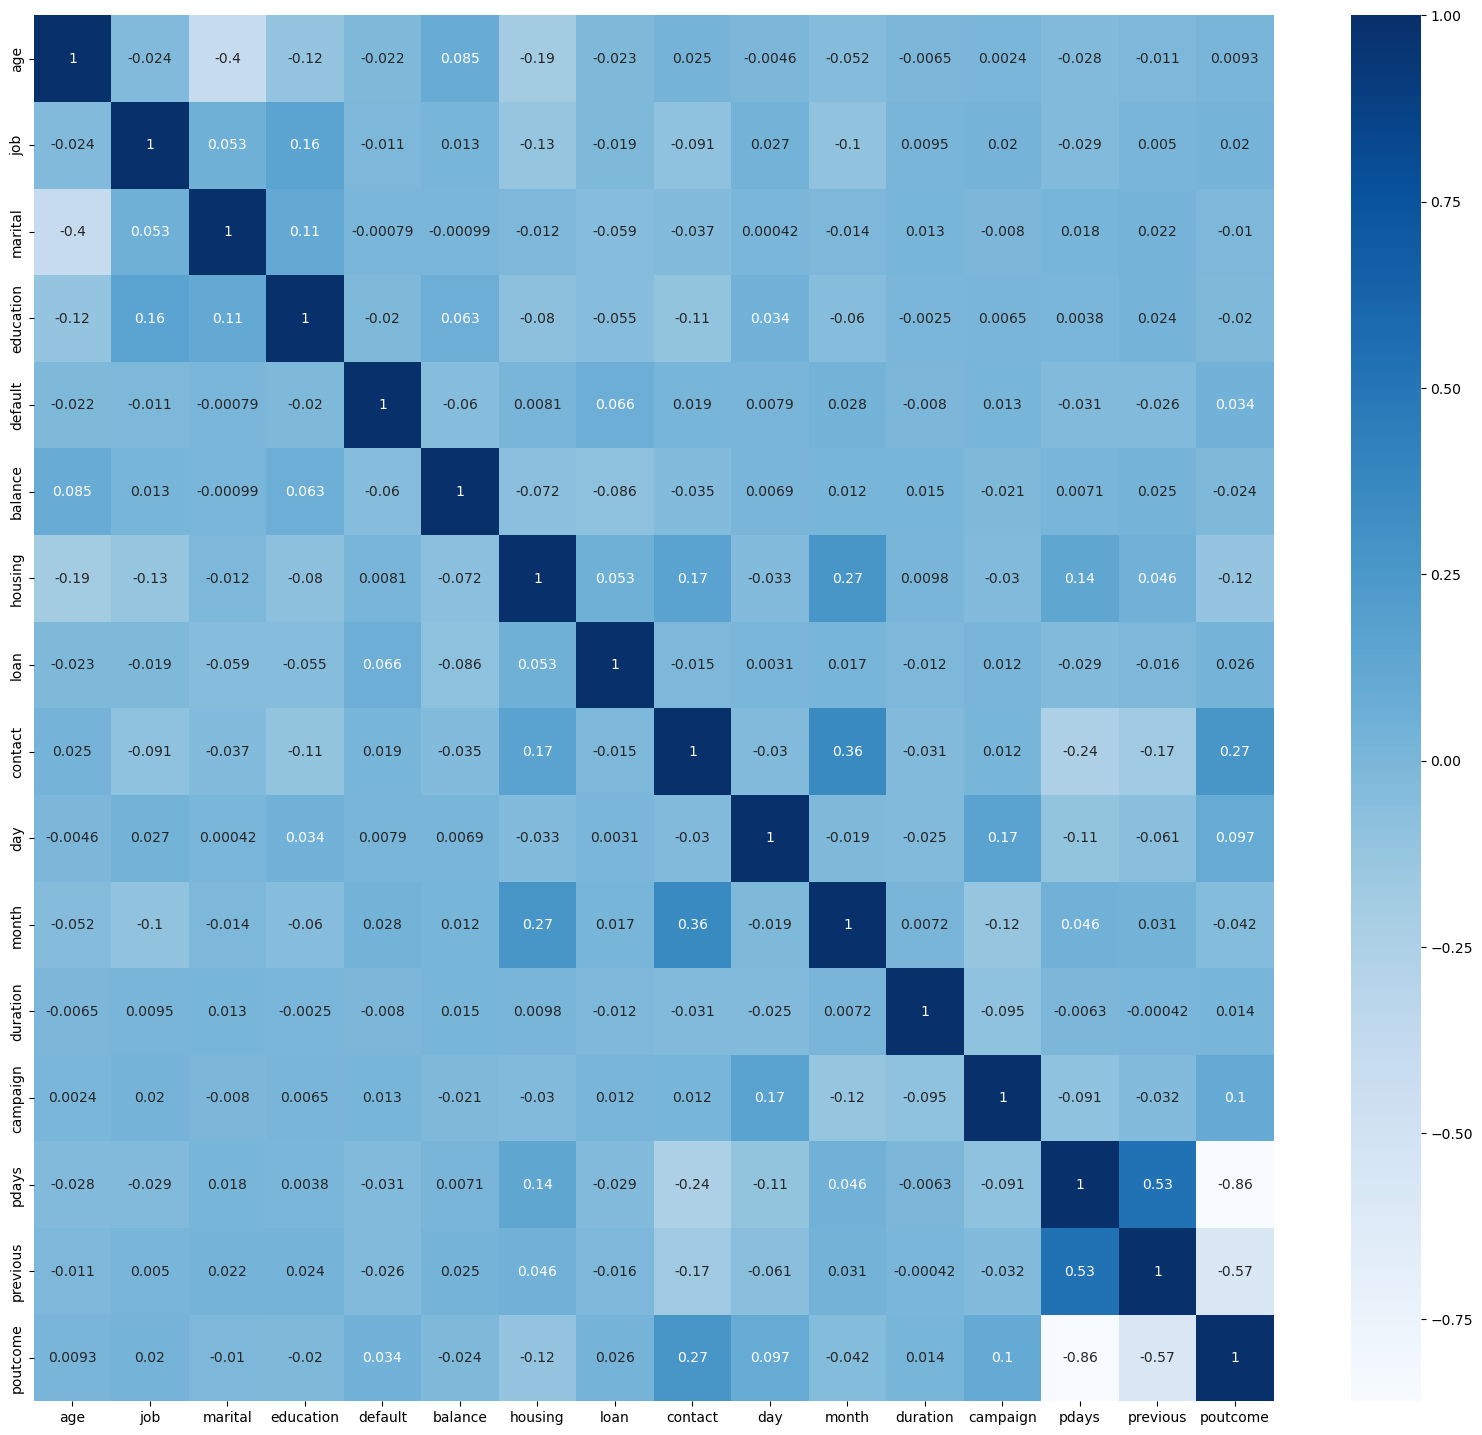

In [52]:
plt.figure(figsize=(20,18))
sns.heatmap(cor, cmap='Blues', annot=True)

In [ ]:
#pdays and poutcome are correlated plus previous and outcome

In [53]:
filtered_data1.skew()

age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance      9.165015
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     3.017221
campaign     4.958236
pdays        2.555601
previous     8.704583
poutcome    -1.921847
dtype: float64

In [54]:
filtered_data1['previous'] = np.cbrt(filtered_data1['previous'])

In [55]:
filtered_data1.skew()

age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance      9.165015
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     3.017221
campaign     4.958236
pdays        2.555601
previous     2.005334
poutcome    -1.921847
dtype: float64

In [56]:
filtered_data1['campaign'] = np.cbrt(filtered_data1['campaign'])

In [57]:
filtered_data1.skew()

age          0.692404
job          0.254647
marital     -0.109220
education    0.192137
default      7.483552
balance      9.165015
housing     -0.226771
loan         1.898587
contact      0.794849
day          0.106806
month       -0.465848
duration     3.017221
campaign     1.618080
pdays        2.555601
previous     2.005334
poutcome    -1.921847
dtype: float64

In [60]:
predictions = model.predict(filtered_data1)

In [61]:
predictions

array([0, 0, 0, ..., 0, 1, 1])

In [62]:
evaluation = pd.DataFrame(predictions).describe()
print(evaluation)

                  0
count  13564.000000
mean       0.374300
std        0.483959
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


In [ ]:
#here we can see that the predicting on the test shows 37% of the clients will accept the term deposit 

In [ ]:
#Since this file does not have the target variable, I wont be able to use Y_test and run further analysis.